In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
import numpy as np
from datetime import datetime
from matplotlib.dates import MonthLocator, DateFormatter

root = Path.cwd()

In [3]:
sep = pd.read_csv(root / 'output' / 'sentinel_indices_sep_measures.csv')

sep['band'] = [x[0] for x in sep.t.str.split('_')]
sep['date'] = [datetime.strptime(x[1], "%Y.%m.%d").date() for x in sep.t.str.split('_')]
sep['month'] = [x.strftime("%b") for x in sep.date]

sep_grouped = sep.groupby('band')


In [5]:
np.unique(sep.band)

array(['evi', 'lswi', 'ndvi', 'psri', 'slavi'], dtype=object)

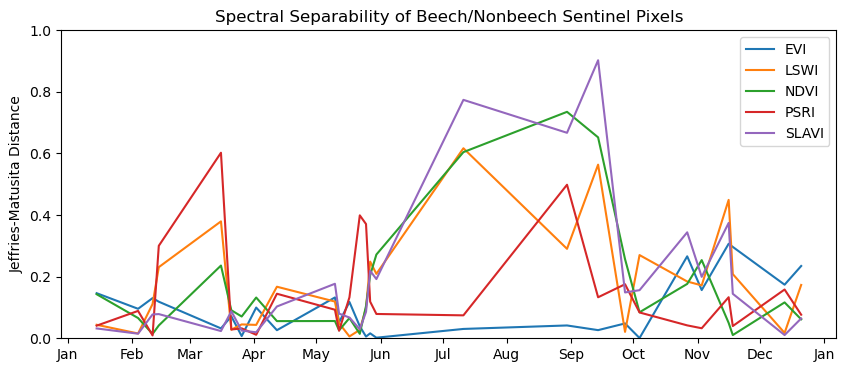

In [18]:
band_names = np.unique(sep.band)

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10,4))
#fig.suptitle('Spectral Separability of Beech/Nonbeech Sentinel Pixels')


for b in band_names:
    g = sep_grouped.get_group(b)
    g.plot('date','jm',ax=ax)

#ax.set_title('Indices',loc='left')
ax.legend(labels=[x.upper() for x in band_names])
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
ax.set_ylabel('Jeffries-Matusita Distance')
ax.set_xlabel(None)
ax.set_ylim((0,1))
ax.set_title('Spectral Separability of Beech/Nonbeech Sentinel Pixels')

plt.show()

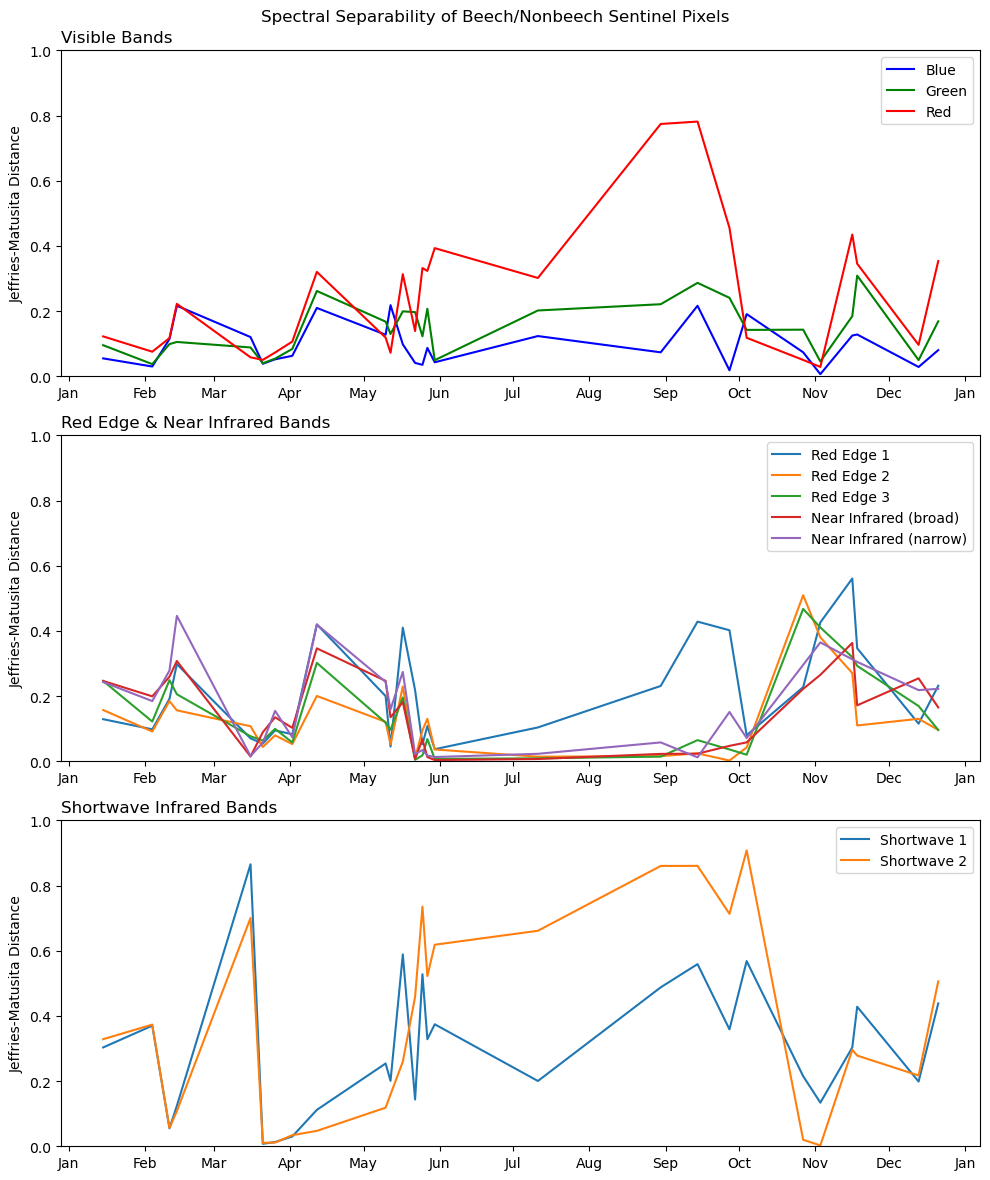

In [ ]:
band_names = np.unique(sep.band)

fig, axes = plt.subplots(ncols=1,nrows=3,figsize=(10,12))
fig.suptitle('Spectral Separability of Beech/Nonbeech Sentinel Pixels')


vis_cols = ['blue','green','red']
vis_bands = ['B02','B03','B04']
for i in range(0,3):
    g = sep_grouped.get_group(vis_bands[i])
    g.plot('date','jm',color=vis_cols[i],ax=axes[0])

axes[0].set_title('Visible Bands',loc='left')
axes[0].legend(labels=['Blue','Green','Red'])


for b in ['B05','B06','B07','B08','B8A']:
    g = sep_grouped.get_group(b)
    g.plot('date','jm',ax=axes[1])

axes[1].set_title('Red Edge & Near Infrared Bands',loc='left')
axes[1].legend(labels=['Red Edge 1', 'Red Edge 2', 'Red Edge 3', 'Near Infrared (broad)', 'Near Infrared (narrow)'])


for b in ['B11','B12']:
    g = sep_grouped.get_group(b)
    g.plot('date','jm',ax=axes[2])

axes[2].set_title('Shortwave Infrared Bands',loc='left')
axes[2].legend(labels=['Shortwave 1', 'Shortwave 2'])

for ax in axes:
    ax.set_xlabel(None)
    ax.set_ylabel('Jeffries-Matusita Distance')
    ax.set_ylim((0,1))
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

fig.tight_layout()

  

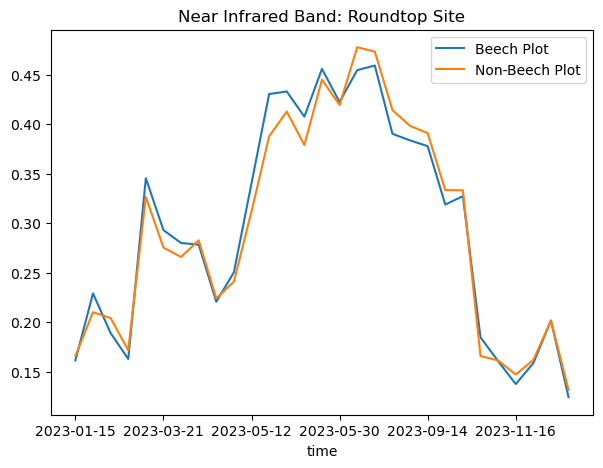

In [23]:
# plot mean spectral band values

pecoy_b = pd.read_csv(root / 'output' / 'roundtop_beech_polygon_means.csv')
pecoy_b = pecoy_b.iloc[:,1:]
pecoy_n = pd.read_csv(root / 'output' / 'roundtop_nonbeech_polygon_means.csv')

fig, ax = plt.subplots(ncols=1, figsize=(7, 5))

pecoy_b.plot('time','B8A',ax=ax)
pecoy_n.plot('time','B8A',ax=ax)
ax.legend(labels=['Beech Plot', 'Non-Beech Plot'])

plt.title('Near Infrared Band: Roundtop Site')
plt.show()